In [ ]:
## tutorial:     https://keras.io/examples/vision/image_classification_from_scratch/

In [3]:
%pip install tensorflow

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Alejandro\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\Alejandro\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Alejandro\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Alejandro\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\Alejandro\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Alejandro\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Alejandro\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Alejandro\anaconda3\lib\ssl.py", line 1099, in read
    return se

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  786M    0  342k    0     0   187k      0  1:11:40  0:00:01  1:11:39  187k
  0  786M    0 1734k    0     0   612k      0  0:21:54  0:00:02  0:21:52  614k
  0  786M    0 2723k    0     0   710k      0  0:18:53  0:00:03  0:18:50  711k
  0  786M    0 3765k    0     0   779k      0  0:17:13  0:00:04  0:17:09  780k
  0  786M    0 4834k    0     0   829k      0  0:16:11  0:00:05  0:16:06  997k
  0  786M    0 5701k    0     0   834k      0  0:16:04  0:00:06  0:15:58 1071k
  0  786M    0 6819k    0     0   870k      0  0:15:24  0:00:07  0:15:17 1017k
  0  786M    0 7511k    0     0   850k      0  0:15:46  0:00:08  0:15:38  957k
  1  786M    1 8970k    0     0   912k      0  0:14

In [10]:
#%unzip -q kagglecatsanddogs_3367a.zip

from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "kagglecatsanddogs_3367a.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

%ls

File Name                                             Modified             Size
PetImages/Cat/                                 2017-02-10 10:01:56            0
PetImages/Cat/0.jpg                            2017-02-10 09:54:54        12213
PetImages/Cat/1.jpg                            2017-02-10 09:54:54        16868
PetImages/Cat/10.jpg                           2017-02-10 09:54:54        35381
PetImages/Cat/100.jpg                          2017-02-10 09:54:54        30725
PetImages/Cat/1000.jpg                         2017-02-10 09:54:54        26344
PetImages/Cat/10000.jpg                        2017-02-10 09:54:54       130307
PetImages/Cat/10001.jpg                        2017-02-10 09:54:54        27005
PetImages/Cat/10002.jpg                        2017-02-10 09:54:54        26185
PetImages/Cat/10003.jpg                        2017-02-10 09:54:54        28574
PetImages/Cat/10004.jpg                        2017-02-10 09:54:54       137076
PetImages/Cat/10005.jpg                 

PetImages/Cat/10357.jpg                        2017-02-10 09:55:06        20410
PetImages/Cat/10358.jpg                        2017-02-10 09:55:06         4699
PetImages/Cat/10359.jpg                        2017-02-10 09:55:06        25108
PetImages/Cat/1036.jpg                         2017-02-10 09:55:06        20107
PetImages/Cat/10360.jpg                        2017-02-10 09:55:06        29875
PetImages/Cat/10361.jpg                        2017-02-10 09:55:06        32888
PetImages/Cat/10362.jpg                        2017-02-10 09:55:06        13967
PetImages/Cat/10363.jpg                        2017-02-10 09:55:06        35514
PetImages/Cat/10364.jpg                        2017-02-10 09:55:06        34704
PetImages/Cat/10365.jpg                        2017-02-10 09:55:06        20183
PetImages/Cat/10366.jpg                        2017-02-10 09:55:06        20661
PetImages/Cat/10367.jpg                        2017-02-10 09:55:06        25798
PetImages/Cat/10368.jpg                 

PetImages/Cat/10999.jpg                        2017-02-10 09:55:30        15075
PetImages/Cat/11.jpg                           2017-02-10 09:55:30        32280
PetImages/Cat/110.jpg                          2017-02-10 09:55:30        23209
PetImages/Cat/1100.jpg                         2017-02-10 09:55:30        26452
PetImages/Cat/11000.jpg                        2017-02-10 09:55:30        19347
PetImages/Cat/11001.jpg                        2017-02-10 09:55:30         9436
PetImages/Cat/11002.jpg                        2017-02-10 09:55:30        33504
PetImages/Cat/11003.jpg                        2017-02-10 09:55:30        16357
PetImages/Cat/11004.jpg                        2017-02-10 09:55:30        41111
PetImages/Cat/11005.jpg                        2017-02-10 09:55:30        24577
PetImages/Cat/11006.jpg                        2017-02-10 09:55:30        35334
PetImages/Cat/11007.jpg                        2017-02-10 09:55:30        30812
PetImages/Cat/11008.jpg                 

PetImages/Cat/11604.jpg                        2017-02-10 09:55:50         8918
PetImages/Cat/11605.jpg                        2017-02-10 09:55:50        20253
PetImages/Cat/11606.jpg                        2017-02-10 09:55:50        51812
PetImages/Cat/11607.jpg                        2017-02-10 09:55:50        30294
PetImages/Cat/11608.jpg                        2017-02-10 09:55:50        15934
PetImages/Cat/11609.jpg                        2017-02-10 09:55:50        24701
PetImages/Cat/1161.jpg                         2017-02-10 09:55:50         7146
PetImages/Cat/11610.jpg                        2017-02-10 09:55:50        24907
PetImages/Cat/11611.jpg                        2017-02-10 09:55:50        23751
PetImages/Cat/11612.jpg                        2017-02-10 09:55:50        18991
PetImages/Cat/11613.jpg                        2017-02-10 09:55:50         5833
PetImages/Cat/11614.jpg                        2017-02-10 09:55:50        17145
PetImages/Cat/11615.jpg                 

PetImages/Cat/12423.jpg                        2017-02-10 09:56:18        40295
PetImages/Cat/12424.jpg                        2017-02-10 09:56:18         6529
PetImages/Cat/12425.jpg                        2017-02-10 09:56:18        27504
PetImages/Cat/12426.jpg                        2017-02-10 09:56:18        28907
PetImages/Cat/12427.jpg                        2017-02-10 09:56:18        24858
PetImages/Cat/12428.jpg                        2017-02-10 09:56:18        10939
PetImages/Cat/12429.jpg                        2017-02-10 09:56:18        33347
PetImages/Cat/1243.jpg                         2017-02-10 09:56:20        28037
PetImages/Cat/12430.jpg                        2017-02-10 09:56:20        13763
PetImages/Cat/12431.jpg                        2017-02-10 09:56:20        35246
PetImages/Cat/12432.jpg                        2017-02-10 09:56:20        31842
PetImages/Cat/12433.jpg                        2017-02-10 09:56:20       103939
PetImages/Cat/12434.jpg                 

PetImages/Cat/2038.jpg                         2017-02-10 09:56:52        29292
PetImages/Cat/2039.jpg                         2017-02-10 09:56:52        24660
PetImages/Cat/204.jpg                          2017-02-10 09:56:52        26911
PetImages/Cat/2040.jpg                         2017-02-10 09:56:52        18476
PetImages/Cat/2041.jpg                         2017-02-10 09:56:52        15030
PetImages/Cat/2042.jpg                         2017-02-10 09:56:52        37571
PetImages/Cat/2043.jpg                         2017-02-10 09:56:52        22640
PetImages/Cat/2044.jpg                         2017-02-10 09:56:52        21317
PetImages/Cat/2045.jpg                         2017-02-10 09:56:52        13976
PetImages/Cat/2046.jpg                         2017-02-10 09:56:52        24328
PetImages/Cat/2047.jpg                         2017-02-10 09:56:52        17736
PetImages/Cat/2048.jpg                         2017-02-10 09:56:52        20464
PetImages/Cat/2049.jpg                  

PetImages/Cat/2674.jpg                         2017-02-10 09:57:16         9152
PetImages/Cat/2675.jpg                         2017-02-10 09:57:16        22863
PetImages/Cat/2676.jpg                         2017-02-10 09:57:16        47746
PetImages/Cat/2677.jpg                         2017-02-10 09:57:16        22313
PetImages/Cat/2678.jpg                         2017-02-10 09:57:16        22233
PetImages/Cat/2679.jpg                         2017-02-10 09:57:16        17713
PetImages/Cat/268.jpg                          2017-02-10 09:57:16       142792
PetImages/Cat/2680.jpg                         2017-02-10 09:57:16        15881
PetImages/Cat/2681.jpg                         2017-02-10 09:57:16        20015
PetImages/Cat/2682.jpg                         2017-02-10 09:57:16         8391
PetImages/Cat/2683.jpg                         2017-02-10 09:57:16         9278
PetImages/Cat/2684.jpg                         2017-02-10 09:57:16        30559
PetImages/Cat/2685.jpg                  

PetImages/Cat/3461.jpg                         2017-02-10 09:57:44        21740
PetImages/Cat/3462.jpg                         2017-02-10 09:57:44        29434
PetImages/Cat/3463.jpg                         2017-02-10 09:57:44        28127
PetImages/Cat/3464.jpg                         2017-02-10 09:57:44        31175
PetImages/Cat/3465.jpg                         2017-02-10 09:57:44        39307
PetImages/Cat/3466.jpg                         2017-02-10 09:57:44        21843
PetImages/Cat/3467.jpg                         2017-02-10 09:57:44        34357
PetImages/Cat/3468.jpg                         2017-02-10 09:57:44       109430
PetImages/Cat/3469.jpg                         2017-02-10 09:57:44        51869
PetImages/Cat/347.jpg                          2017-02-10 09:57:44        27064
PetImages/Cat/3470.jpg                         2017-02-10 09:57:44        28199
PetImages/Cat/3471.jpg                         2017-02-10 09:57:44        28779
PetImages/Cat/3472.jpg                  

PetImages/Cat/4244.jpg                         2017-02-10 09:58:10        20930
PetImages/Cat/4245.jpg                         2017-02-10 09:58:10        19742
PetImages/Cat/4246.jpg                         2017-02-10 09:58:10        54737
PetImages/Cat/4247.jpg                         2017-02-10 09:58:10        26784
PetImages/Cat/4248.jpg                         2017-02-10 09:58:10        88289
PetImages/Cat/4249.jpg                         2017-02-10 09:58:10        14994
PetImages/Cat/425.jpg                          2017-02-10 09:58:10        18691
PetImages/Cat/4250.jpg                         2017-02-10 09:58:10        47956
PetImages/Cat/4251.jpg                         2017-02-10 09:58:10        39233
PetImages/Cat/4252.jpg                         2017-02-10 09:58:10        33434
PetImages/Cat/4253.jpg                         2017-02-10 09:58:10        28314
PetImages/Cat/4254.jpg                         2017-02-10 09:58:10        19556
PetImages/Cat/4255.jpg                  

PetImages/Cat/5039.jpg                         2017-02-10 09:58:38        22009
PetImages/Cat/504.jpg                          2017-02-10 09:58:38        35332
PetImages/Cat/5040.jpg                         2017-02-10 09:58:38        35071
PetImages/Cat/5041.jpg                         2017-02-10 09:58:38        26337
PetImages/Cat/5042.jpg                         2017-02-10 09:58:38        83383
PetImages/Cat/5043.jpg                         2017-02-10 09:58:38        34858
PetImages/Cat/5044.jpg                         2017-02-10 09:58:38        69909
PetImages/Cat/5045.jpg                         2017-02-10 09:58:38        13992
PetImages/Cat/5046.jpg                         2017-02-10 09:58:38        41741
PetImages/Cat/5047.jpg                         2017-02-10 09:58:38        27325
PetImages/Cat/5048.jpg                         2017-02-10 09:58:38        31108
PetImages/Cat/5049.jpg                         2017-02-10 09:58:38         9103
PetImages/Cat/505.jpg                   

PetImages/Cat/6162.jpg                         2017-02-10 09:59:16        19719
PetImages/Cat/6163.jpg                         2017-02-10 09:59:16        46806
PetImages/Cat/6164.jpg                         2017-02-10 09:59:16        24635
PetImages/Cat/6165.jpg                         2017-02-10 09:59:16        26997
PetImages/Cat/6166.jpg                         2017-02-10 09:59:16        16555
PetImages/Cat/6167.jpg                         2017-02-10 09:59:16        14100
PetImages/Cat/6168.jpg                         2017-02-10 09:59:16        18667
PetImages/Cat/6169.jpg                         2017-02-10 09:59:16       108904
PetImages/Cat/617.jpg                          2017-02-10 09:59:16        45874
PetImages/Cat/6170.jpg                         2017-02-10 09:59:16        30527
PetImages/Cat/6171.jpg                         2017-02-10 09:59:16        19694
PetImages/Cat/6172.jpg                         2017-02-10 09:59:16        30082
PetImages/Cat/6173.jpg                  

PetImages/Cat/6792.jpg                         2017-02-10 09:59:38        47135
PetImages/Cat/6793.jpg                         2017-02-10 09:59:38        14677
PetImages/Cat/6794.jpg                         2017-02-10 09:59:38        30902
PetImages/Cat/6795.jpg                         2017-02-10 09:59:38        41072
PetImages/Cat/6796.jpg                         2017-02-10 09:59:38        50392
PetImages/Cat/6797.jpg                         2017-02-10 09:59:38        30843
PetImages/Cat/6798.jpg                         2017-02-10 09:59:38        16333
PetImages/Cat/6799.jpg                         2017-02-10 09:59:38        18937
PetImages/Cat/68.jpg                           2017-02-10 09:59:38        32462
PetImages/Cat/680.jpg                          2017-02-10 09:59:38        40746
PetImages/Cat/6800.jpg                         2017-02-10 09:59:38        44646
PetImages/Cat/6801.jpg                         2017-02-10 09:59:38        23531
PetImages/Cat/6802.jpg                  

PetImages/Cat/7559.jpg                         2017-02-10 10:00:08         8788
PetImages/Cat/756.jpg                          2017-02-10 10:00:08        24618
PetImages/Cat/7560.jpg                         2017-02-10 10:00:08        18022
PetImages/Cat/7561.jpg                         2017-02-10 10:00:08        19603
PetImages/Cat/7562.jpg                         2017-02-10 10:00:08         9461
PetImages/Cat/7563.jpg                         2017-02-10 10:00:08        53022
PetImages/Cat/7564.jpg                         2017-02-10 10:00:08         9987
PetImages/Cat/7565.jpg                         2017-02-10 10:00:08        21909
PetImages/Cat/7566.jpg                         2017-02-10 10:00:08        20546
PetImages/Cat/7567.jpg                         2017-02-10 10:00:08        12369
PetImages/Cat/7568.jpg                         2017-02-10 10:00:08        47702
PetImages/Cat/7569.jpg                         2017-02-10 10:00:08        17194
PetImages/Cat/757.jpg                   

PetImages/Cat/8232.jpg                         2017-02-10 10:00:40        34488
PetImages/Cat/8233.jpg                         2017-02-10 10:00:40        96602
PetImages/Cat/8234.jpg                         2017-02-10 10:00:40         7598
PetImages/Cat/8235.jpg                         2017-02-10 10:00:40        11880
PetImages/Cat/8236.jpg                         2017-02-10 10:00:40        19187
PetImages/Cat/8237.jpg                         2017-02-10 10:00:40        18491
PetImages/Cat/8238.jpg                         2017-02-10 10:00:40        17118
PetImages/Cat/8239.jpg                         2017-02-10 10:00:40        39660
PetImages/Cat/824.jpg                          2017-02-10 10:00:40        32178
PetImages/Cat/8240.jpg                         2017-02-10 10:00:40        25714
PetImages/Cat/8241.jpg                         2017-02-10 10:00:40        29126
PetImages/Cat/8242.jpg                         2017-02-10 10:00:40        27745
PetImages/Cat/8243.jpg                  

PetImages/Cat/8913.jpg                         2017-02-10 10:01:10       102570
PetImages/Cat/8914.jpg                         2017-02-10 10:01:10        19468
PetImages/Cat/8915.jpg                         2017-02-10 10:01:10        15402
PetImages/Cat/8916.jpg                         2017-02-10 10:01:10        22378
PetImages/Cat/8917.jpg                         2017-02-10 10:01:10        18485
PetImages/Cat/8918.jpg                         2017-02-10 10:01:10        34502
PetImages/Cat/8919.jpg                         2017-02-10 10:01:10         9327
PetImages/Cat/892.jpg                          2017-02-10 10:01:10        33100
PetImages/Cat/8920.jpg                         2017-02-10 10:01:10        17264
PetImages/Cat/8921.jpg                         2017-02-10 10:01:10        35478
PetImages/Cat/8922.jpg                         2017-02-10 10:01:10        17570
PetImages/Cat/8923.jpg                         2017-02-10 10:01:10        25444
PetImages/Cat/8924.jpg                  

PetImages/Cat/9748.jpg                         2017-02-10 10:01:48        38168
PetImages/Cat/9749.jpg                         2017-02-10 10:01:48        21743
PetImages/Cat/975.jpg                          2017-02-10 10:01:48        40022
PetImages/Cat/9750.jpg                         2017-02-10 10:01:48        20919
PetImages/Cat/9751.jpg                         2017-02-10 10:01:48        15600
PetImages/Cat/9752.jpg                         2017-02-10 10:01:48       182718
PetImages/Cat/9753.jpg                         2017-02-10 10:01:48         5412
PetImages/Cat/9754.jpg                         2017-02-10 10:01:48        19381
PetImages/Cat/9755.jpg                         2017-02-10 10:01:48        38428
PetImages/Cat/9756.jpg                         2017-02-10 10:01:48        23428
PetImages/Cat/9757.jpg                         2017-02-10 10:01:48        16365
PetImages/Cat/9758.jpg                         2017-02-10 10:01:48         7883
PetImages/Cat/9759.jpg                  

PetImages/Dog/10811.jpg                        2017-02-10 10:02:32         5600
PetImages/Dog/10812.jpg                        2017-02-10 10:02:32        17096
PetImages/Dog/10813.jpg                        2017-02-10 10:02:32        17850
PetImages/Dog/10814.jpg                        2017-02-10 10:02:32        27061
PetImages/Dog/10815.jpg                        2017-02-10 10:02:32        31136
PetImages/Dog/10816.jpg                        2017-02-10 10:02:32       111254
PetImages/Dog/10817.jpg                        2017-02-10 10:02:32        36050
PetImages/Dog/10818.jpg                        2017-02-10 10:02:32        27343
PetImages/Dog/10819.jpg                        2017-02-10 10:02:32        55378
PetImages/Dog/1082.jpg                         2017-02-10 10:02:32       112753
PetImages/Dog/10820.jpg                        2017-02-10 10:02:32        13265
PetImages/Dog/10821.jpg                        2017-02-10 10:02:32        27131
PetImages/Dog/10822.jpg                 

PetImages/Dog/11387.jpg                        2017-02-10 10:03:50        38429
PetImages/Dog/11388.jpg                        2017-02-10 10:03:50        34019
PetImages/Dog/11389.jpg                        2017-02-10 10:03:50        33667
PetImages/Dog/1139.jpg                         2017-02-10 10:03:50        13139
PetImages/Dog/11390.jpg                        2017-02-10 10:03:50        34281
PetImages/Dog/11391.jpg                        2017-02-10 10:03:50        23188
PetImages/Dog/11392.jpg                        2017-02-10 10:03:50        53571
PetImages/Dog/11393.jpg                        2017-02-10 10:03:50         9940
PetImages/Dog/11394.jpg                        2017-02-10 10:03:50        22140
PetImages/Dog/11395.jpg                        2017-02-10 10:03:50        57189
PetImages/Dog/11396.jpg                        2017-02-10 10:03:50        21090
PetImages/Dog/11397.jpg                        2017-02-10 10:03:52        24541
PetImages/Dog/11398.jpg                 

PetImages/Dog/12211.jpg                        2017-02-10 10:04:58        34788
PetImages/Dog/12212.jpg                        2017-02-10 10:04:58        52247
PetImages/Dog/12213.jpg                        2017-02-10 10:04:58        30205
PetImages/Dog/12214.jpg                        2017-02-10 10:04:58        24675
PetImages/Dog/12215.jpg                        2017-02-10 10:04:58        48098
PetImages/Dog/12216.jpg                        2017-02-10 10:04:58        30824
PetImages/Dog/12217.jpg                        2017-02-10 10:04:58        29580
PetImages/Dog/12218.jpg                        2017-02-10 10:04:58        29296
PetImages/Dog/12219.jpg                        2017-02-10 10:04:58        33126
PetImages/Dog/1222.jpg                         2017-02-10 10:04:58        49224
PetImages/Dog/12220.jpg                        2017-02-10 10:04:58        22679
PetImages/Dog/12221.jpg                        2017-02-10 10:04:58        44850
PetImages/Dog/12222.jpg                 

PetImages/Dog/1754.jpg                         2017-02-10 10:05:32        41693
PetImages/Dog/1755.jpg                         2017-02-10 10:05:32        25614
PetImages/Dog/1756.jpg                         2017-02-10 10:05:32        35740
PetImages/Dog/1757.jpg                         2017-02-10 10:05:32        37590
PetImages/Dog/1758.jpg                         2017-02-10 10:05:32        34185
PetImages/Dog/1759.jpg                         2017-02-10 10:05:32       203805
PetImages/Dog/176.jpg                          2017-02-10 10:05:32        21882
PetImages/Dog/1760.jpg                         2017-02-10 10:05:32        19750
PetImages/Dog/1761.jpg                         2017-02-10 10:05:32        28272
PetImages/Dog/1762.jpg                         2017-02-10 10:05:32        19285
PetImages/Dog/1763.jpg                         2017-02-10 10:05:32        28110
PetImages/Dog/1764.jpg                         2017-02-10 10:05:32        25322
PetImages/Dog/1765.jpg                  

PetImages/Dog/2570.jpg                         2017-02-10 10:06:08        45365
PetImages/Dog/2571.jpg                         2017-02-10 10:06:08        57249
PetImages/Dog/2572.jpg                         2017-02-10 10:06:08        14209
PetImages/Dog/2573.jpg                         2017-02-10 10:06:08       177896
PetImages/Dog/2574.jpg                         2017-02-10 10:06:08        15895
PetImages/Dog/2575.jpg                         2017-02-10 10:06:08        30120
PetImages/Dog/2576.jpg                         2017-02-10 10:06:08        29462
PetImages/Dog/2577.jpg                         2017-02-10 10:06:08        20688
PetImages/Dog/2578.jpg                         2017-02-10 10:06:08        30277
PetImages/Dog/2579.jpg                         2017-02-10 10:06:08        35723
PetImages/Dog/258.jpg                          2017-02-10 10:06:08        26131
PetImages/Dog/2580.jpg                         2017-02-10 10:06:08        25091
PetImages/Dog/2581.jpg                  

PetImages/Dog/3739.jpg                         2017-02-10 10:07:00        52860
PetImages/Dog/374.jpg                          2017-02-10 10:07:00        44470
PetImages/Dog/3740.jpg                         2017-02-10 10:07:00        17496
PetImages/Dog/3741.jpg                         2017-02-10 10:07:00        21858
PetImages/Dog/3742.jpg                         2017-02-10 10:07:00        27798
PetImages/Dog/3743.jpg                         2017-02-10 10:07:00        16606
PetImages/Dog/3744.jpg                         2017-02-10 10:07:00        26348
PetImages/Dog/3745.jpg                         2017-02-10 10:07:00        33456
PetImages/Dog/3746.jpg                         2017-02-10 10:07:00        27617
PetImages/Dog/3747.jpg                         2017-02-10 10:07:00        27951
PetImages/Dog/3748.jpg                         2017-02-10 10:07:00        22706
PetImages/Dog/3749.jpg                         2017-02-10 10:07:00        58170
PetImages/Dog/375.jpg                   

PetImages/Dog/4500.jpg                         2017-02-10 10:07:36        19366
PetImages/Dog/4501.jpg                         2017-02-10 10:07:36        22456
PetImages/Dog/4502.jpg                         2017-02-10 10:07:36        26043
PetImages/Dog/4503.jpg                         2017-02-10 10:07:36        43679
PetImages/Dog/4504.jpg                         2017-02-10 10:07:36        48214
PetImages/Dog/4505.jpg                         2017-02-10 10:07:36        17824
PetImages/Dog/4506.jpg                         2017-02-10 10:07:36        35435
PetImages/Dog/4507.jpg                         2017-02-10 10:07:36        10362
PetImages/Dog/4508.jpg                         2017-02-10 10:07:36        19497
PetImages/Dog/4509.jpg                         2017-02-10 10:07:36         3501
PetImages/Dog/451.jpg                          2017-02-10 10:07:36        41028
PetImages/Dog/4510.jpg                         2017-02-10 10:07:36        45289
PetImages/Dog/4511.jpg                  

PetImages/Dog/5241.jpg                         2017-02-10 10:08:16        41307
PetImages/Dog/5242.jpg                         2017-02-10 10:08:16        24272
PetImages/Dog/5243.jpg                         2017-02-10 10:08:16       147474
PetImages/Dog/5244.jpg                         2017-02-10 10:08:16        35427
PetImages/Dog/5245.jpg                         2017-02-10 10:08:16        67660
PetImages/Dog/5246.jpg                         2017-02-10 10:08:16        16911
PetImages/Dog/5247.jpg                         2017-02-10 10:08:16        32534
PetImages/Dog/5248.jpg                         2017-02-10 10:08:16        36021
PetImages/Dog/5249.jpg                         2017-02-10 10:08:16        70468
PetImages/Dog/525.jpg                          2017-02-10 10:08:16        23579
PetImages/Dog/5250.jpg                         2017-02-10 10:08:16        14844
PetImages/Dog/5251.jpg                         2017-02-10 10:08:16        12680
PetImages/Dog/5252.jpg                  

PetImages/Dog/5899.jpg                         2017-02-10 10:08:48        30142
PetImages/Dog/59.jpg                           2017-02-10 10:08:48        30851
PetImages/Dog/590.jpg                          2017-02-10 10:08:48        46585
PetImages/Dog/5900.jpg                         2017-02-10 10:08:48       188175
PetImages/Dog/5901.jpg                         2017-02-10 10:08:48        54795
PetImages/Dog/5902.jpg                         2017-02-10 10:08:48        25071
PetImages/Dog/5903.jpg                         2017-02-10 10:08:48        30662
PetImages/Dog/5904.jpg                         2017-02-10 10:08:48        38359
PetImages/Dog/5905.jpg                         2017-02-10 10:08:48        38201
PetImages/Dog/5906.jpg                         2017-02-10 10:08:48        34084
PetImages/Dog/5907.jpg                         2017-02-10 10:08:48        35721
PetImages/Dog/5908.jpg                         2017-02-10 10:08:48        58450
PetImages/Dog/5909.jpg                  

PetImages/Dog/6651.jpg                         2017-02-10 10:09:18        44505
PetImages/Dog/6652.jpg                         2017-02-10 10:09:18        33260
PetImages/Dog/6653.jpg                         2017-02-10 10:09:18        10019
PetImages/Dog/6654.jpg                         2017-02-10 10:09:18        27310
PetImages/Dog/6655.jpg                         2017-02-10 10:09:20        24381
PetImages/Dog/6656.jpg                         2017-02-10 10:09:20        48766
PetImages/Dog/6657.jpg                         2017-02-10 10:09:20        38736
PetImages/Dog/6658.jpg                         2017-02-10 10:09:20        28399
PetImages/Dog/6659.jpg                         2017-02-10 10:09:20       114754
PetImages/Dog/666.jpg                          2017-02-10 10:09:20        21866
PetImages/Dog/6660.jpg                         2017-02-10 10:09:20        19331
PetImages/Dog/6661.jpg                         2017-02-10 10:09:20        33912
PetImages/Dog/6662.jpg                  

PetImages/Dog/7593.jpg                         2017-02-10 10:10:02        43406
PetImages/Dog/7594.jpg                         2017-02-10 10:10:02        37519
PetImages/Dog/7595.jpg                         2017-02-10 10:10:02        26266
PetImages/Dog/7596.jpg                         2017-02-10 10:10:02        20190
PetImages/Dog/7597.jpg                         2017-02-10 10:10:02        10386
PetImages/Dog/7598.jpg                         2017-02-10 10:10:02        47238
PetImages/Dog/7599.jpg                         2017-02-10 10:10:02        19102
PetImages/Dog/76.jpg                           2017-02-10 10:10:04         5962
PetImages/Dog/760.jpg                          2017-02-10 10:10:04        17080
PetImages/Dog/7600.jpg                         2017-02-10 10:10:04        51354
PetImages/Dog/7601.jpg                         2017-02-10 10:10:04        39482
PetImages/Dog/7602.jpg                         2017-02-10 10:10:04         1938
PetImages/Dog/7603.jpg                  

PetImages/Dog/8559.jpg                         2017-02-10 10:11:38        33682
PetImages/Dog/856.jpg                          2017-02-10 10:11:38        36438
PetImages/Dog/8560.jpg                         2017-02-10 10:11:38        21567
PetImages/Dog/8561.jpg                         2017-02-10 10:11:38        30026
PetImages/Dog/8562.jpg                         2017-02-10 10:11:38        96790
PetImages/Dog/8563.jpg                         2017-02-10 10:11:38       405174
PetImages/Dog/8564.jpg                         2017-02-10 10:11:38        35811
PetImages/Dog/8565.jpg                         2017-02-10 10:11:38        18290
PetImages/Dog/8566.jpg                         2017-02-10 10:11:38        95962
PetImages/Dog/8567.jpg                         2017-02-10 10:11:38        17040
PetImages/Dog/8568.jpg                         2017-02-10 10:11:38        34687
PetImages/Dog/8569.jpg                         2017-02-10 10:11:38         6624
PetImages/Dog/857.jpg                   

PetImages/Dog/9368.jpg                         2017-02-10 10:12:18        49414
PetImages/Dog/9369.jpg                         2017-02-10 10:12:18        68037
PetImages/Dog/937.jpg                          2017-02-10 10:12:18        22736
PetImages/Dog/9370.jpg                         2017-02-10 10:12:18        46486
PetImages/Dog/9371.jpg                         2017-02-10 10:12:18        21515
PetImages/Dog/9372.jpg                         2017-02-10 10:12:18        28042
PetImages/Dog/9373.jpg                         2017-02-10 10:12:18        28071
PetImages/Dog/9374.jpg                         2017-02-10 10:12:18        31804
PetImages/Dog/9375.jpg                         2017-02-10 10:12:18        29294
PetImages/Dog/9376.jpg                         2017-02-10 10:12:18        30459
PetImages/Dog/9377.jpg                         2017-02-10 10:12:18        12163
PetImages/Dog/9378.jpg                         2017-02-10 10:12:18        66512
PetImages/Dog/9379.jpg                  

PetImages/Dog/9864.jpg                         2017-02-10 10:12:42        38707
PetImages/Dog/9865.jpg                         2017-02-10 10:12:42        25475
PetImages/Dog/9866.jpg                         2017-02-10 10:12:42         9991
PetImages/Dog/9867.jpg                         2017-02-10 10:12:42       122151
PetImages/Dog/9868.jpg                         2017-02-10 10:12:42         6173
PetImages/Dog/9869.jpg                         2017-02-10 10:12:42        79448
PetImages/Dog/987.jpg                          2017-02-10 10:12:42        24466
PetImages/Dog/9870.jpg                         2017-02-10 10:12:42        18913
PetImages/Dog/9871.jpg                         2017-02-10 10:12:42         5676
PetImages/Dog/9872.jpg                         2017-02-10 10:12:42        45145
PetImages/Dog/9873.jpg                         2017-02-10 10:12:42        24350
PetImages/Dog/9874.jpg                         2017-02-10 10:12:42         5626
PetImages/Dog/9875.jpg                  

Done!
 Volume in drive C is OS
 Volume Serial Number is 707B-393F

 Directory of C:\Users\Alejandro\Desktop\bol\surestart

02/20/2021  12:21 AM    <DIR>          .
02/20/2021  12:21 AM    <DIR>          ..
02/19/2021  04:33 PM    <DIR>          .ipynb_checkpoints
02/12/2021  09:38 AM    <DIR>          archive
02/12/2021  09:35 AM         3,460,534 archive.zip
02/20/2021  12:17 AM         2,335,108 cats and dogs.ipynb
02/18/2021  04:28 PM         1,320,336 final_model.h5
02/19/2021  04:44 PM       824,894,548 kagglecatsanddogs_3367a.zip
02/20/2021  12:21 AM            35,545 MSR-LA - 3467.docx
02/20/2021  12:18 AM    <DIR>          PetImages
02/20/2021  12:21 AM               104 readme[1].txt
02/18/2021  04:15 PM            61,602 sample_image.png
02/18/2021  08:08 PM            45,947 train mnist.ipynb
               8 File(s)    832,153,724 bytes
               5 Dir(s)  813,593,587,712 bytes free


In [2]:
%ls PetImages

 Volume in drive C is OS
 Volume Serial Number is 707B-393F

 Directory of C:\Users\Alejandro\Desktop\bol\surestart\PetImages

02/20/2021  12:18 AM    <DIR>          .
02/20/2021  12:18 AM    <DIR>          ..
02/20/2021  12:18 AM    <DIR>          Cat
02/20/2021  12:21 AM    <DIR>          Dog
               0 File(s)              0 bytes
               4 Dir(s)  815,214,923,776 bytes free


In [9]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)


Deleted 1578 images


In [2]:
tf.__version__

'2.3.0'

In [3]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


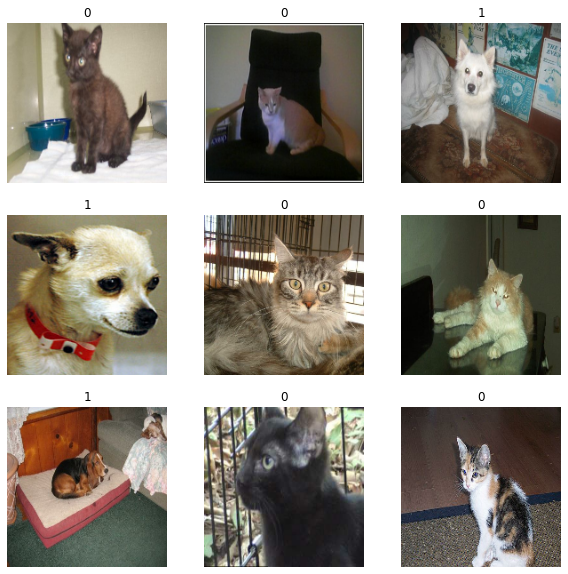

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [7]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

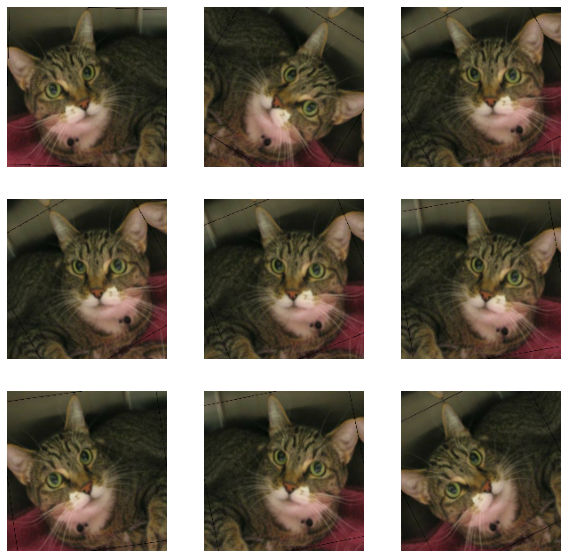

In [8]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [9]:
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
...  # Rest of the model



##not runu this,,,,for gpu

NameError: name 'input_shape' is not defined

In [10]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [11]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [12]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [ ]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

In [ ]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/6779.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)